# Setup

In [44]:
from typing import List

import nltk
import numpy
import pandas
import seaborn
from matplotlib import pyplot
from nltk import tokenize
from wordcloud import WordCloud

import constants

# Load data

In [2]:
train_df = pandas.read_csv(constants.DATA_PATH / 'train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test_df = pandas.read_csv(constants.DATA_PATH / 'test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [5]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
full_df = pandas.concat([train_df.assign(sample_id='train'),
                         test_df.assign(sample_id='test')],
                         ignore_index=True)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10876 entries, 0 to 10875
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         10876 non-null  int64  
 1   keyword    10789 non-null  object 
 2   location   7238 non-null   object 
 3   text       10876 non-null  object 
 4   target     7613 non-null   float64
 5   sample_id  10876 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 509.9+ KB


# Id

In [7]:
full_df.groupby('sample_id')['id'].nunique()

sample_id
test     3263
train    7613
Name: id, dtype: int64

<Axes: xlabel='id'>

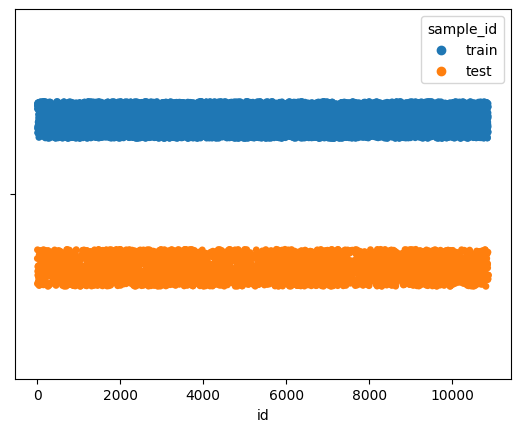

In [8]:
seaborn.stripplot(data=full_df, x='id', hue='sample_id', dodge=True)

# Target

In [9]:
full_df['target'].value_counts(normalize=True)

target
0.0    0.57034
1.0    0.42966
Name: proportion, dtype: float64

<Axes: xlabel='id'>

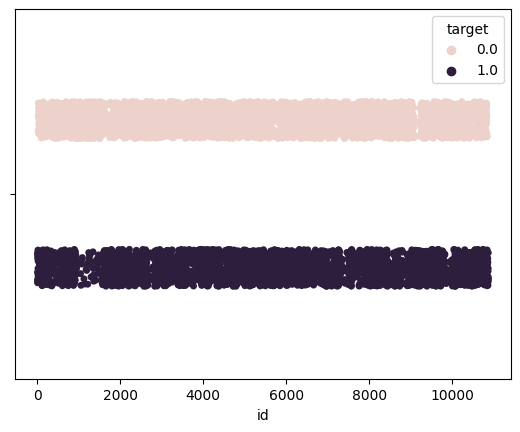

In [10]:
seaborn.stripplot(data=full_df, x='id', hue='target', dodge=True)

# Features

## Keyword

In [11]:
full_df['keyword'].nunique()

221

In [12]:
full_df['keyword'].describe()

count      10789
unique       221
top       ablaze
freq          50
Name: keyword, dtype: object

<Axes: xlabel='keyword', ylabel='Percent'>

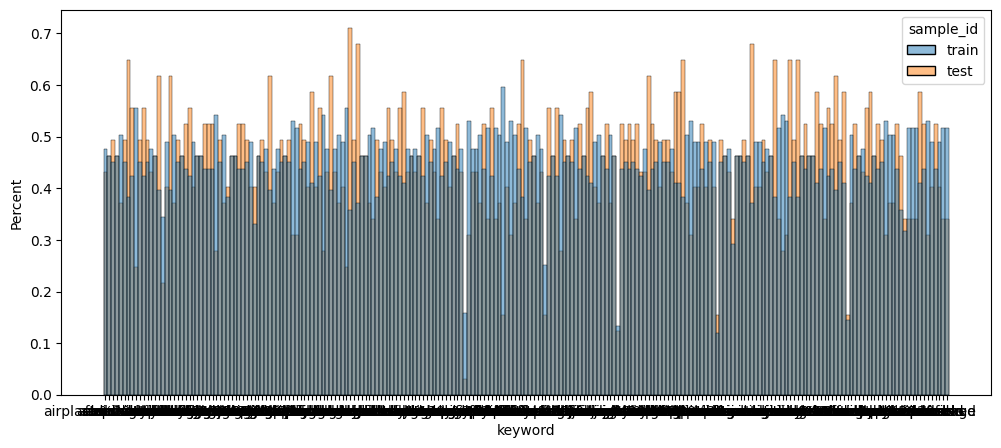

In [13]:
_ = pyplot.figure(figsize=(12, 5))
seaborn.histplot(data=full_df,
                 x='keyword',
                 hue='sample_id',
                 stat='percent',
                 common_norm=False)

<Axes: xlabel='na_flag', ylabel='Percent'>

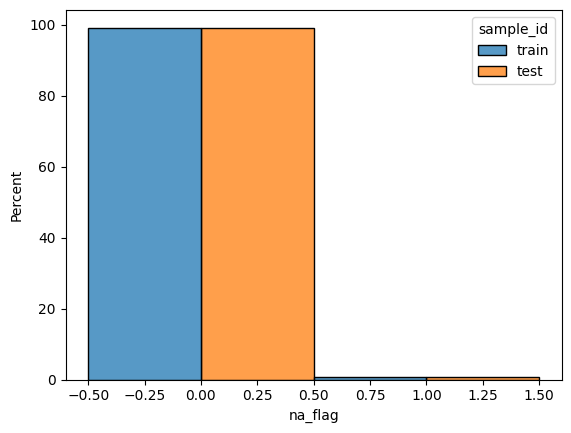

In [14]:
seaborn.histplot(data=full_df.assign(na_flag=full_df['keyword'].isna().astype(int)),
                 x='na_flag',
                 hue='sample_id',
                 stat='percent',
                 discrete=True,
                 common_norm=False,
                 multiple='dodge')

<Axes: xlabel='keyword', ylabel='Percent'>

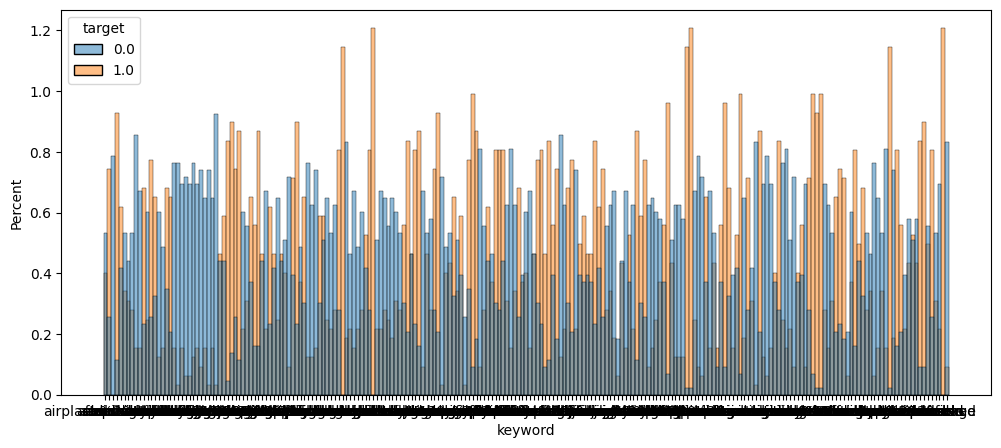

In [15]:
_ = pyplot.figure(figsize=(12, 5))
seaborn.histplot(data=full_df[full_df['sample_id'] == 'train'],
                 x='keyword',
                 hue='target',
                 stat='percent',
                 common_norm=False)

<Axes: xlabel='na_flag', ylabel='Percent'>

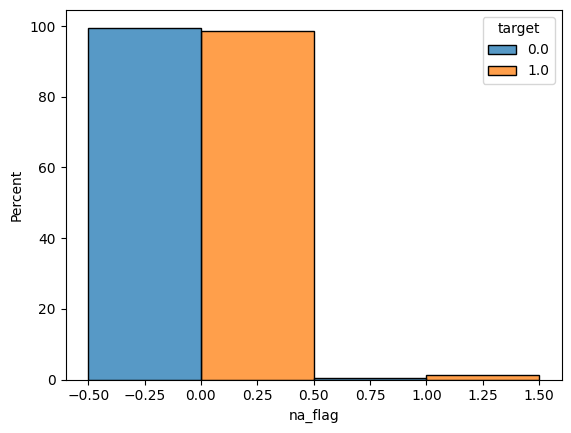

In [16]:
seaborn.histplot(data=full_df.assign(na_flag=full_df['keyword'].isna().astype(int))[full_df['sample_id'] == 'train'],
                 x='na_flag',
                 hue='target',
                 stat='percent',
                 discrete=True,
                 common_norm=False,
                 multiple='dodge')

(-0.5, 399.5, 199.5, -0.5)

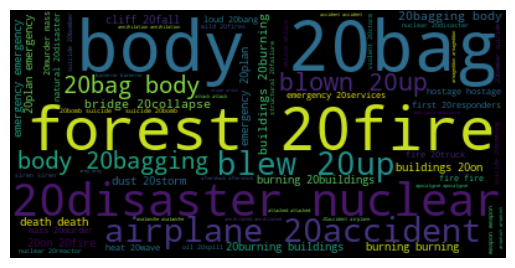

In [17]:
text = ' '.join(full_df['keyword'].dropna())
wordcloud = WordCloud().generate(text)

pyplot.imshow(wordcloud, interpolation='bilinear')
pyplot.axis("off")

<Axes: xlabel='sample_id', ylabel='count'>

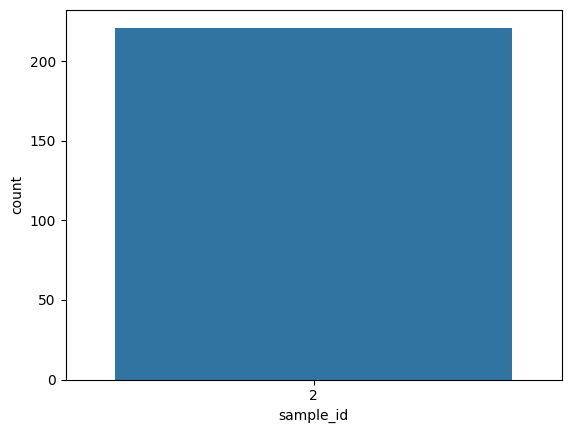

In [18]:
seaborn.countplot(x=full_df.groupby('keyword')['sample_id'].nunique())

## Location

In [19]:
full_df['location'].nunique()

4521

In [20]:
full_df['location'].describe()

count     7238
unique    4521
top        USA
freq       141
Name: location, dtype: object

<Axes: xlabel='category', ylabel='Percent'>

/opt/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 137 (\x89) missing from current font.
  func(*args, **kwargs)
/opt/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
/opt/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 144 (\x90) missing from current font.
  func(*args, **kwargs)
/opt/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 144 (\x90) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


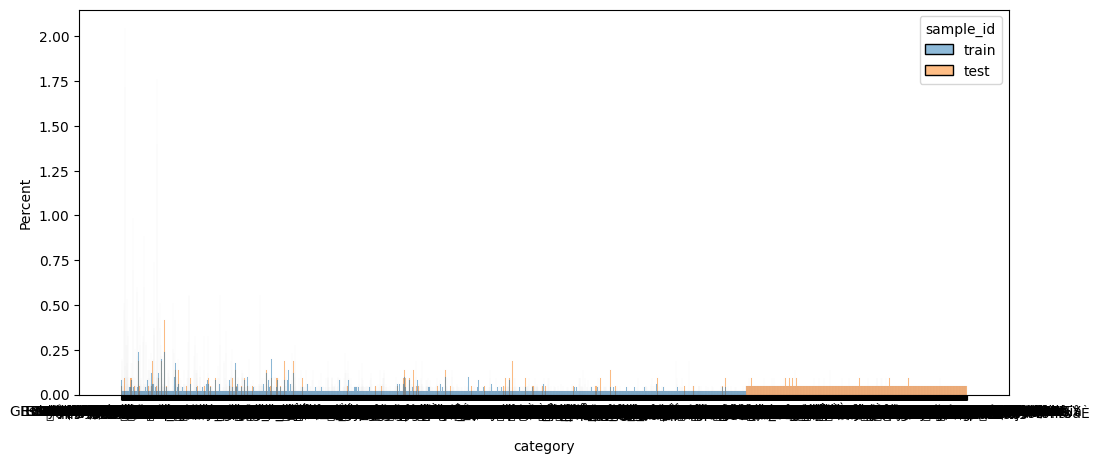

In [21]:
_ = pyplot.figure(figsize=(12, 5))
seaborn.histplot(data=full_df.assign(category=full_df['location'].str.replace('$', '&')),
                 x='category',
                 hue='sample_id',
                 stat='percent',
                 discrete=True,
                 common_norm=False)

<Axes: xlabel='na_flag', ylabel='Percent'>

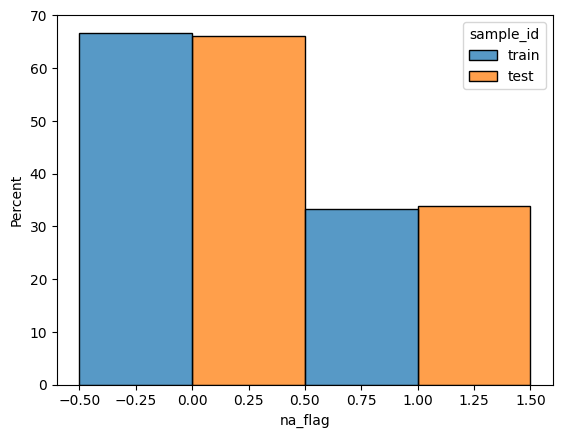

In [22]:
seaborn.histplot(data=full_df.assign(na_flag=full_df['location'].isna().astype(int)),
                 x='na_flag',
                 hue='sample_id',
                 stat='percent',
                 discrete=True,
                 common_norm=False,
                 multiple='dodge')

<Axes: xlabel='category', ylabel='Percent'>

/opt/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 137 (\x89) missing from current font.
  func(*args, **kwargs)
/opt/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
/opt/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 144 (\x90) missing from current font.
  func(*args, **kwargs)
/opt/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 144 (\x90) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


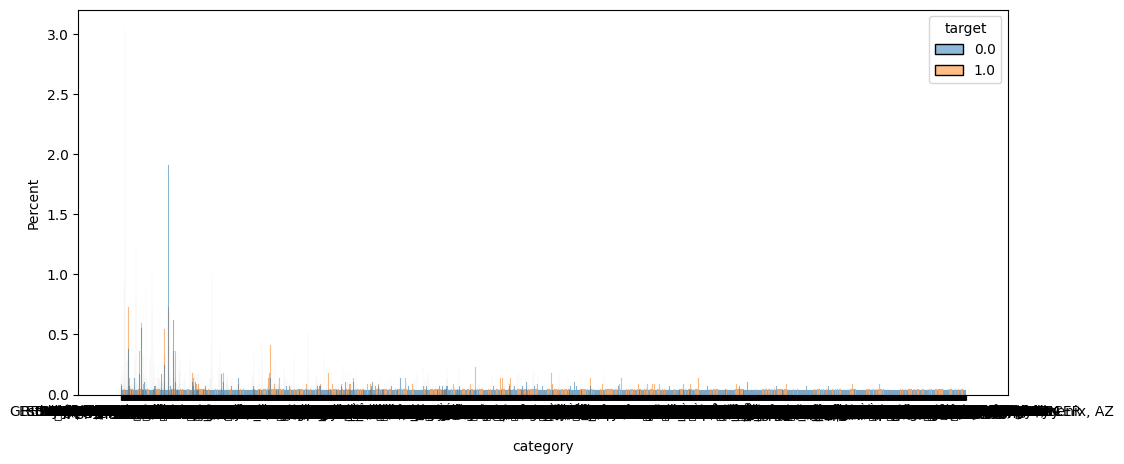

In [23]:
_ = pyplot.figure(figsize=(12, 5))
seaborn.histplot(data=full_df.assign(category=full_df['location'].str.replace('$', '&'))[full_df['sample_id'] == 'train'],
                 x='category',
                 hue='target',
                 stat='percent',
                 common_norm=False)

<Axes: xlabel='na_flag', ylabel='Percent'>

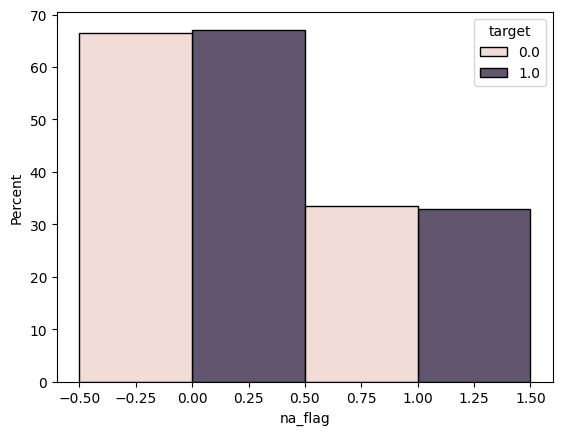

In [24]:
seaborn.histplot(data=full_df.assign(na_flag=full_df['location'].isna().astype(int)),
                 x='na_flag',
                 hue='target',
                 stat='percent',
                 discrete=True,
                 common_norm=False,
                 multiple='dodge')

(-0.5, 399.5, 199.5, -0.5)

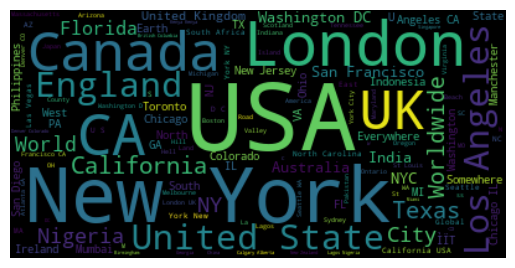

In [25]:
text = ' '.join(full_df['location'].dropna().replace(' ', '_'))
wordcloud = WordCloud().generate(text)

pyplot.imshow(wordcloud, interpolation='bilinear')
pyplot.axis("off")

<Axes: xlabel='sample_id', ylabel='count'>

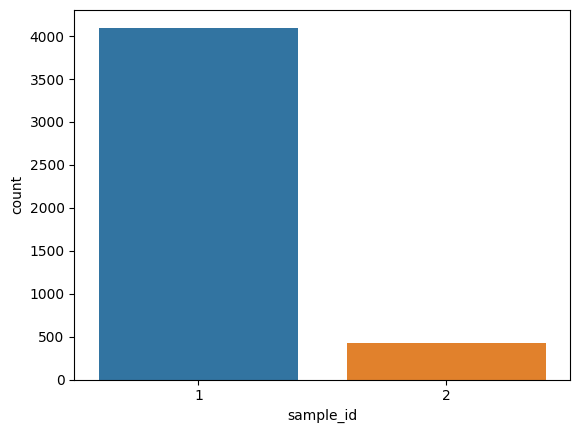

In [26]:
seaborn.countplot(x=full_df.groupby('location')['sample_id'].nunique())

## Text

(-0.5, 399.5, 199.5, -0.5)

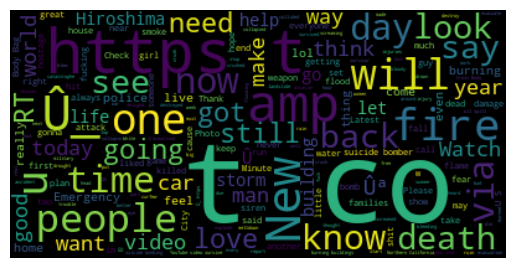

In [27]:
text = ' '.join(full_df['text'])
wordcloud = WordCloud().generate(text)

pyplot.imshow(wordcloud, interpolation='bilinear')
pyplot.axis("off")

<Axes: xlabel='text', ylabel='Percent'>

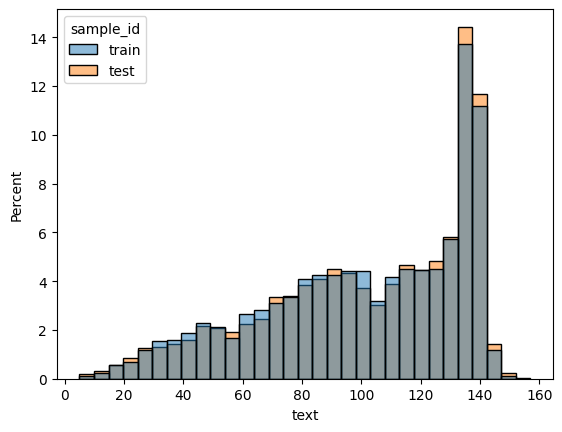

In [28]:
seaborn.histplot(x=full_df['text'].map(str.__len__),
                 hue=full_df['sample_id'],
                 stat='percent',
                 common_norm=False)

<Axes: xlabel='text', ylabel='Percent'>

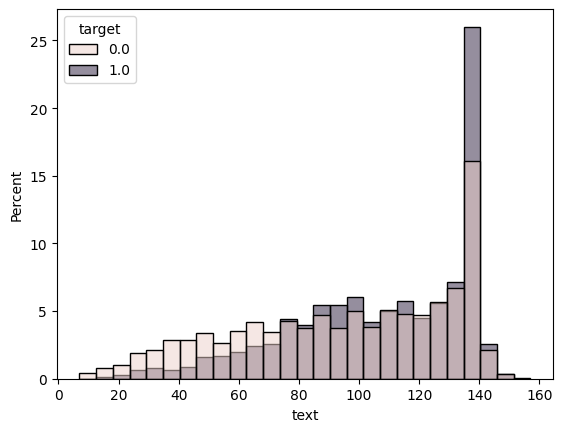

In [29]:
seaborn.histplot(x=full_df['text'].map(str.__len__)[full_df['sample_id'] == 'train'],
                 hue=full_df['target'],
                 stat='percent',
                 common_norm=False)

<Axes: xlabel='text', ylabel='Percent'>

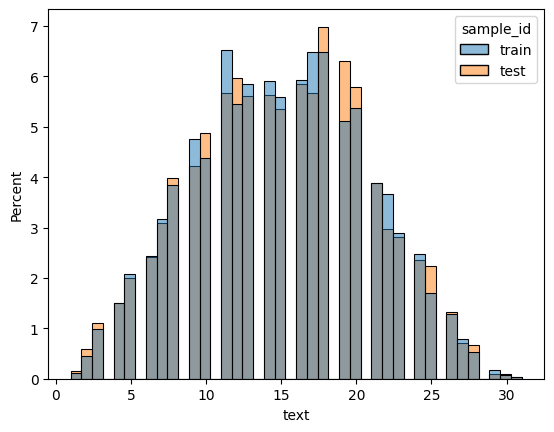

In [30]:
seaborn.histplot(x=full_df['text'].apply(lambda txt: len(txt.split())),
                 hue=full_df['sample_id'],
                 stat='percent',
                 common_norm=False)

<Axes: xlabel='text', ylabel='Percent'>

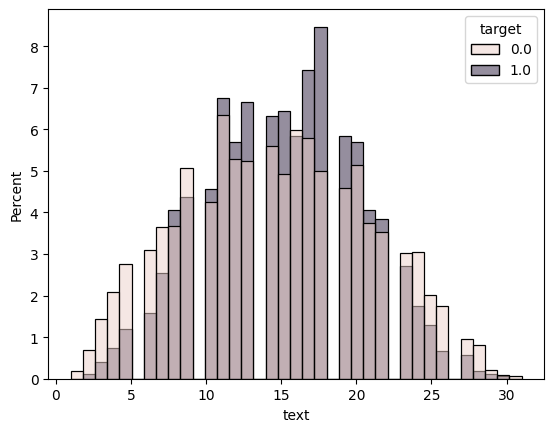

In [31]:
seaborn.histplot(x=full_df['text'].apply(lambda txt: len(txt.split()))[full_df['sample_id'] == 'train'],
                 hue=full_df['target'],
                 stat='percent',
                 common_norm=False)

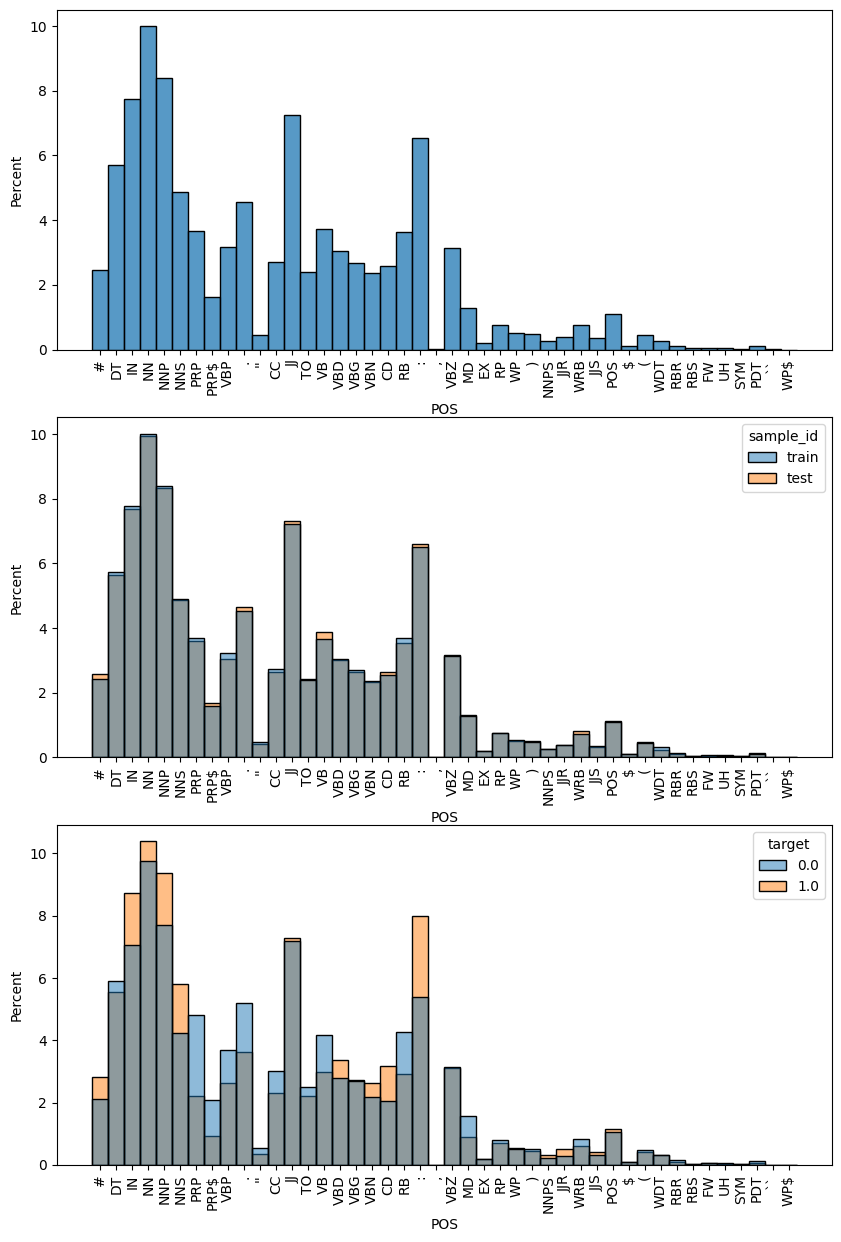

In [46]:
data_df = full_df.copy()
data_df['POS'] = (
    full_df['text']
    .apply(lambda txt: [pos for _,pos in nltk.pos_tag(tokenize.word_tokenize(txt))])
    .map(numpy.unique)
)
data_df = data_df.explode('POS')

_, axs = pyplot.subplots(nrows=3, ncols=1, figsize=(10, 15))
axs: List[pyplot.Axes] = axs.ravel().tolist()

seaborn.histplot(data=data_df, x='POS', stat='percent', ax=axs[0])
seaborn.histplot(data=data_df, x='POS', hue='sample_id', stat='percent', common_norm=False, ax=axs[1])
seaborn.histplot(data=data_df[data_df['sample_id'] == 'train'],
                 x='POS', hue='target', stat='percent', common_norm=False, ax=axs[2])

for ax in axs:
    ax.tick_params(axis='x', labelrotation=90)